<a href="https://colab.research.google.com/github/hc0rd31r0/estatistica/blob/main/Analise_Descritiva_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
url = 'https://github.com/hc0rd31r0/estatistica/blob/main/dados/dados.csv?raw=true'
dados = pd.read_csv(url)

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [4]:
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
salario_minimo = 788
classes_renda = [ dados.Renda.min(), 
                  salario_minimo * 2, 
                  salario_minimo * 5, 
                  salario_minimo * 15,
                  salario_minimo * 25, 
                  dados.Renda.max() ]
classes_renda

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [6]:
labels_classes = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [7]:
frequencia = pd.value_counts( 
    pd.cut( x = dados.Renda,
           bins = classes_renda,
           labels = labels_classes,
           include_lowest = True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
percentuais = pd.value_counts( 
    pd.cut( x = dados.Renda,
           bins = classes_renda,
           labels = labels_classes,
           include_lowest = True),
    normalize = True) * 100
percentuais

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
dist_freq_Renda = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentuais}
)
dist_freq_Renda.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

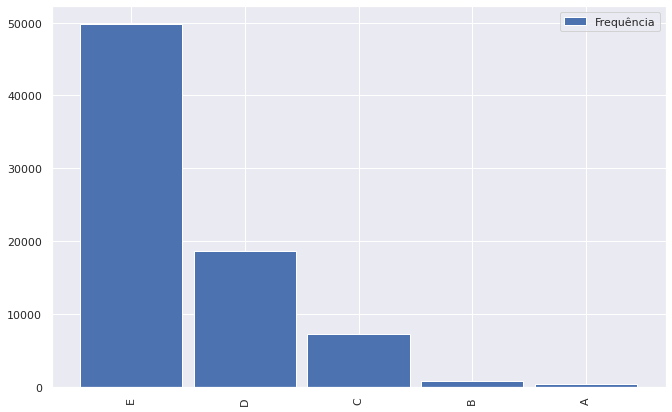

In [10]:
 dist_freq_Renda.plot(kind="bar", y='Frequência', figsize=(11,7), width = 0.9)

> ### Conclusões

1. As maiores frequências (chefes de família) estão nas classes E e D, represetando 89% do nosso dataSet.
2. Enquanto os que ganham acima de 20 Salários  (Classe A) é representado por apenas 0,5%.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

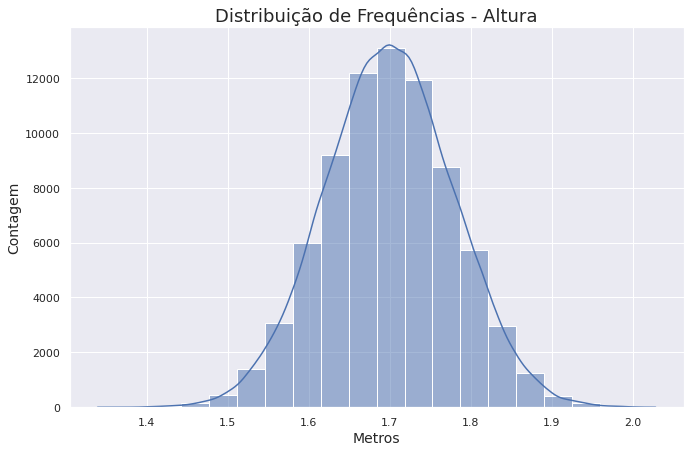

In [11]:
ax = sns.histplot(data=dados.Altura, kde=True, bins=20)
ax.figure.set_size_inches(11,7)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax

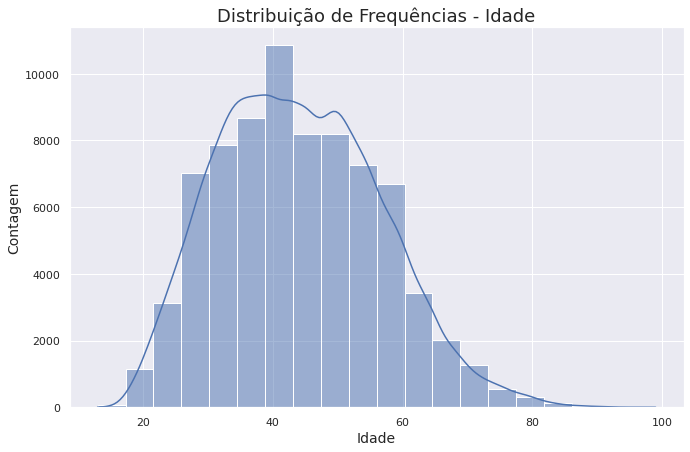

In [12]:
ax = sns.histplot(data=dados.Idade, kde=True, bins=20)
ax.figure.set_size_inches(11,7)
ax.set_title('Distribuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Idade', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax

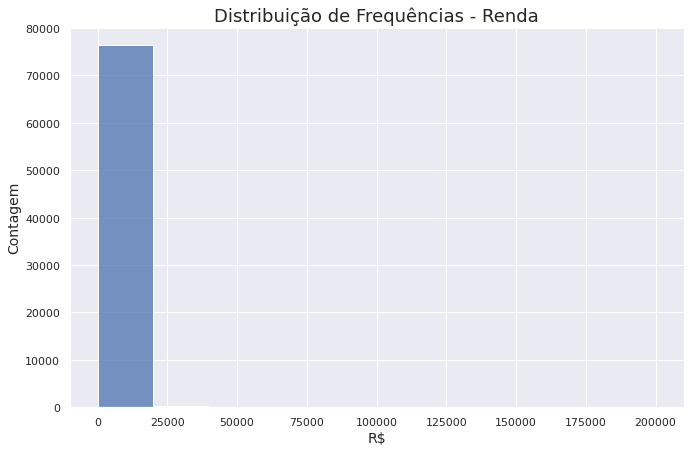

In [13]:
ax = sns.histplot(data=dados.Renda, bins=10)
ax.figure.set_size_inches(11,7)
ax.set_title('Distribuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax

> ### Conclusões

1. No histograma por Altura temos uma distribuição simétrica.
2. No histograma por Idade uma leve simetria a Direita, com um pico nas idades entre 40 e 45 anos.
3. No histograma por Renda, temos poucas ocorrências com valores tão altas que não temos um histograma, é um gráfico com uma única barra que representa a maior parte da nossa distribuição.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

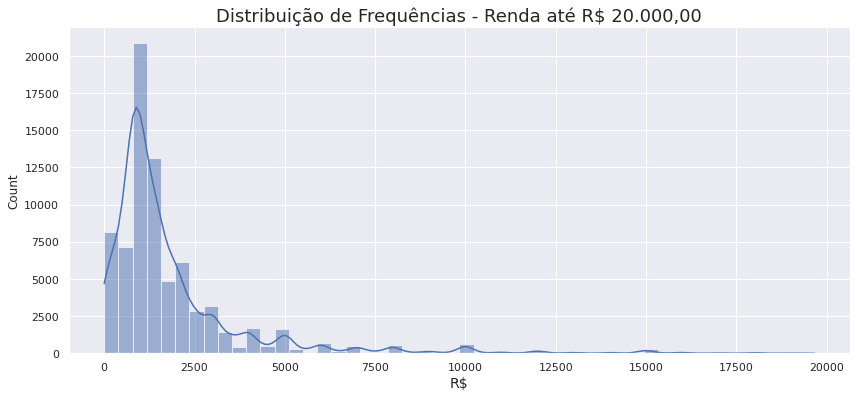

In [14]:
ax = sns.histplot(data=dados.query("Renda < 20000")['Renda'], kde=True, bins=50)
#ax = sns.distplot(dados.query("Renda < 20000")['Renda'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Renda até R$ 20.000,00', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzamento das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [15]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [16]:
df_sexo_cor = pd.crosstab(dados.Sexo, 
                          dados.Cor )
df_sexo_cor.rename(index=sexo, inplace=True)
df_sexo_cor.rename(columns=cor, inplace=True)
df_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [17]:
df_sexo_cor_perc = pd.crosstab(dados.Sexo, 
                               dados.Cor, 
                               normalize=True) * 100
df_sexo_cor_perc.rename(index=sexo, inplace=True)
df_sexo_cor_perc.rename(columns=cor, inplace=True)
df_sexo_cor_perc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

1. No dataSet temos uma grande representatividade do sexo Masculino, respondendo por 28,8% (cor Branca) e 32,6% (cor Parda), ou seja, 61%.
2; O sexo Feminino tem 12,5% (cor Branca) e 14,1% (cor Parda), 26,6%, como chefes de família.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [18]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [19]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [20]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [21]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [22]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [23]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [24]:
dist_renda = pd.crosstab(dados.Cor, 
                         dados.Sexo, 
                         values=dados.Renda,
                         aggfunc = {'mean','median','max'})
dist_renda.rename(index=cor, inplace=True)
dist_renda.rename(columns=sexo, inplace=True)
dist_renda

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

1. Temos um valor máximo (max) da Renda do Sexo Masculino da cor Branca (R$ 200.00,00) sendo o dobro da cor Parda e também o dobro do sexo Feminino da cor Branca, e 4x maior para os homens da cor Preta e Amarela.

2. Temos a média da Renda da cor Indígena do sexo Feminino de (R$ 2.464,38), mas a mediana é de 788,00 (Salário Mínimo), ou seja, metade tem rendimento até um salário.

3. A maior média de Renda é do Sexo Masculino da Cor Amarela (R$ 4.758,25), nas sabemos que é uma variável que sobre muita influência dos extremos, tanto que a mediana é de (2.800,00).

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

onde é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):


### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [25]:
pd.options.display.float_format = "{:,.2f}".format

In [26]:
dist_renda = pd.crosstab(dados.Cor, 
                         dados.Sexo, 
                         values=dados.Renda,
                         aggfunc={'mad','var','std'})
dist_renda.rename(index=cor, inplace=True)
dist_renda.rename(columns=sexo, inplace=True)
dist_renda

mad                std                     var               
Sexo     Masculino Feminino Masculino  Feminino     Masculino       Feminino
Cor                                                                         
Indígena    798.91 3,007.89  1,204.09 11,957.50  1,449,841.13 142,981,765.40
Branca    2,261.01 1,670.97  4,750.79  3,251.01 22,570,023.41  10,569,086.53
Preta       975.60   705.45  1,936.31  1,349.80  3,749,293.59   1,821,959.52
Amarela   3,709.60 2,549.15  5,740.82  3,731.17 32,957,069.62  13,921,656.88
Parda     1,125.83   811.58  2,312.09  1,596.23  5,345,747.15   2,547,959.94

> ### Conclusões

1. O maior valor do desvio médio absoluto está com o homem da cor Amarela.
2. O maior valor do desvio padrão está na mulher Indígena.
3. O maior valor de variância também está com a mulher Indígena.
4. A menor diferença no desvio padrão comparando os sexos, está na cor Preta.



### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

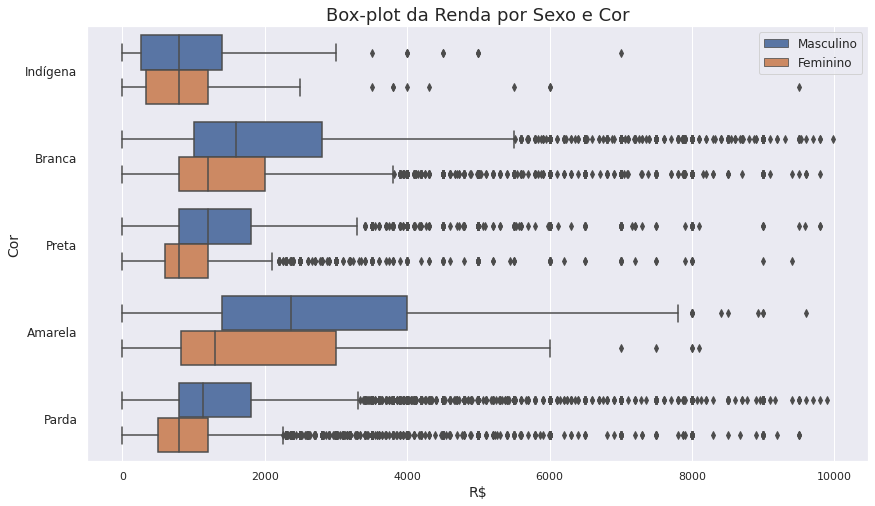

In [27]:
ax = sns.boxplot( x = 'Renda', y = 'Cor',  hue='Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14, 8)
ax.set_title('Box-plot da Renda por Sexo e Cor', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)
ax.set_yticklabels(['Indígena','Branca','Preta','Amarela','Parda','Sem declaração'], fontsize=12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], fontsize=12)
ax

> ### Conclusões

1. A menor renda é observada nos representantes Indígenas, e a distribuição parece ser simétrica, tanto para homens como mulheres
2. A maior renda é observada nos representantes Amarelos e há uma grande Assimétria à Direita. mais acentuada no sexo Feminino.
3. Há poucos pontos fora dos limites para as cores Indígena e Amarela, bem diferente das cores Branca e Parda.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [28]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, salario_minimo, kind='weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [29]:
valor = dados.Renda.quantile(q=0.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [30]:
df_anos_estudo_sexo = pd.crosstab(dados['Anos de Estudo'], 
                                  dados.Sexo,                                   
                                  aggfunc= { 'mean', 'median', 'max', 'std' },
                                  values=dados.Renda, ).round(2)
df_anos_estudo_sexo.rename(index=anos_de_estudo, inplace=True)
df_anos_estudo_sexo.rename(columns=sexo, inplace=True)
df_anos_estudo_sexo

max             ...       std         
Sexo                            Masculino   Feminino  ... Masculino Feminino
Anos de Estudo                                        ...                   
Sem instrução e menos de 1 ano  30,000.00  10,000.00  ...  1,023.90   639.31
1 ano                           30,000.00   2,000.00  ...  1,331.95   425.29
2 anos                          40,000.00   4,000.00  ...  1,435.17   498.23
3 anos                          80,000.00   3,500.00  ...  2,143.80   424.12
4 anos                          50,000.00  10,000.00  ...  1,419.82   629.55
5 anos                          35,000.00   8,000.00  ...  1,484.65   635.78
6 anos                          25,000.00   6,000.00  ...  1,476.63   574.55
7 anos                          40,000.00   9,000.00  ...  1,419.71   602.04
8 anos                          30,000.00  18,000.00  ...  1,515.58   896.78
9 anos                          60,000.00  20,000.00  ...  2,137.66   973.22
10 anos                         45,000.00   6,000.00  ...  2,078.61   620.61
11 anos                        200,000.00 100,000.00  ...  2,676.54 1,819.04
12 anos                         30,000.00 120,000.00  ...  2,268.08 4,851.83
13 anos                         25,000.00  20,000.00  ...  2,797.12 2,053.79
14 anos                         50,000.00  20,000.00  ...  3,987.21 2,064.08
15 anos ou mais                200,000.00 100,000.00  ...  7,447.61 4,212.77
Não determinados                 7,000.00   3,000.00  ...    979.65   459.99

[17 rows x 8 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

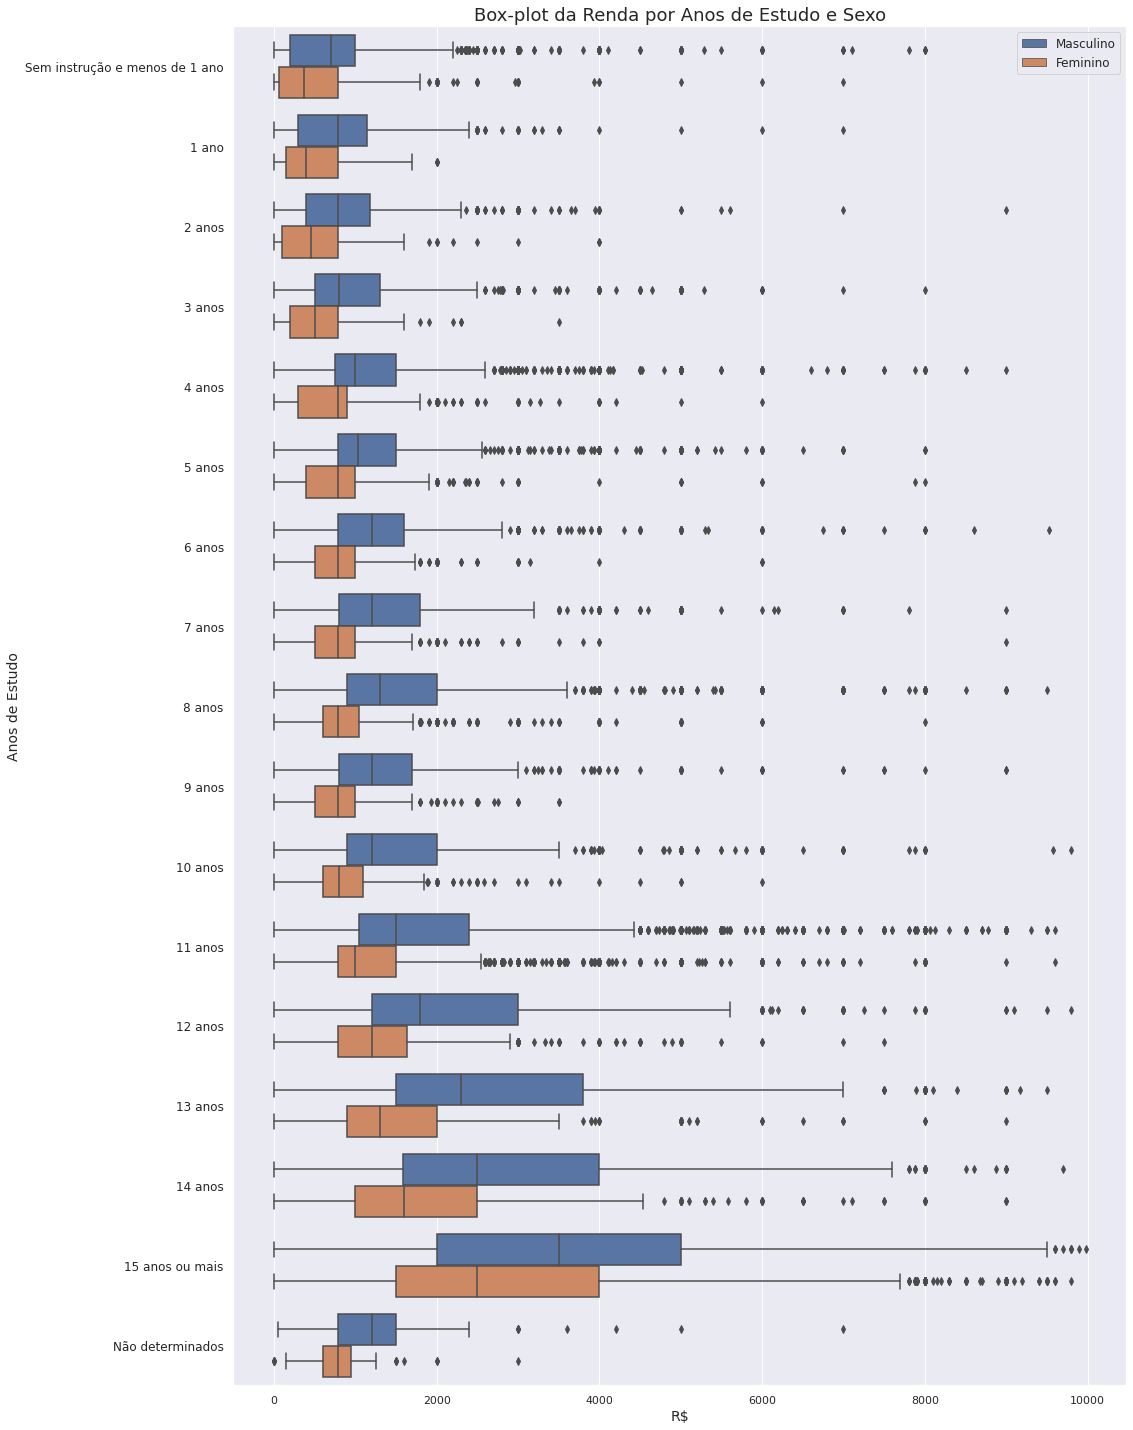

In [31]:
ax = sns.boxplot( x = 'Renda', y = 'Anos de Estudo',  hue='Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(16, 25)
ax.set_title('Box-plot da Renda por Anos de Estudo e Sexo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], fontsize=12)
ax

> ### Conclusões

1. A medida que vai aumentando a quantidade de anos de estudo a renda tambem aumenta.
2. O aumento da renda para o Sexo Feminino só é mais perceptível após 10 anos de estudos.
3. Durante toda a distribuição as mulheres SEMPRE estão ganhando menos, independentemente da quantidade de anos de estudo.
4. Observando o box-plot para 14 anos de estudos, percebemos que o 1º quartil (Q1) dos homens e igual a mediana das mulheres, e a mediana dos homens é igual ao 3º quartils (Q3) das mulheres.
5. Com 15 anos ou menos de estudo, as mulheres *ganham abaixo da mediana* do rendimennto dos homens, **uma desigualdade impressionante e preocupante**. Essa situação só melhora um pouco após 15 anos ou mais de estudo, mais ainda abaixo do rendimento do homem.


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [32]:
df_renda_UF = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
df_renda_UF.rename(index=uf, inplace=True)
df_renda_UF.sort_values(by=[('Renda','std')])
#df_renda_UF

Renda                        
                        mean median     max      std
UF                                                  
Alagoas             1,144.55    788   11000 1,237.86
Sergipe             1,109.11    788   16000 1,479.00
Rio Grande do Norte 1,344.72    800   15500 1,651.81
Amazonas            1,445.13    900   22000 1,757.94
Ceará               1,255.40    789   25000 1,821.96
Maranhão            1,019.43    700   30000 1,887.82
Paraíba             1,293.37    788   30000 1,950.27
Amapá               1,861.35   1200   15580 2,020.69
Pará                1,399.08    850   50000 2,053.78
Roraima             1,783.59   1000   20000 2,079.66
Goiás               1,994.58   1500   30000 2,221.93
Acre                1,506.09    900   30000 2,276.23
Piauí               1,074.55    750   40000 2,373.36
Pernambuco          1,527.08    900   50000 2,389.62
Rondônia            1,789.76   1200   50000 2,406.16
Mato Grosso         2,130.65   1500   35000 2,542.63
Rio Grande do Sul   2,315.16   1500   35000 2,913.34
Tocantins           1,771.09   1000   60000 2,934.59
Mato Grosso do Sul  2,262.60   1500   42000 3,031.42
Santa Catarina      2,470.85   1800   80000 3,137.65
São Paulo           2,638.10   1600   80000 3,503.78
Bahia               1,429.65    800  200000 3,507.92
Espírito Santo      2,026.38   1274  100000 3,513.85
Minas Gerais        2,056.43   1200  100000 3,584.72
Paraná              2,493.87   1500  200000 4,302.94
Rio de Janeiro      2,496.40   1400  200000 5,214.58
Distrito Federal    4,241.95   2000  100000 5,550.46

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

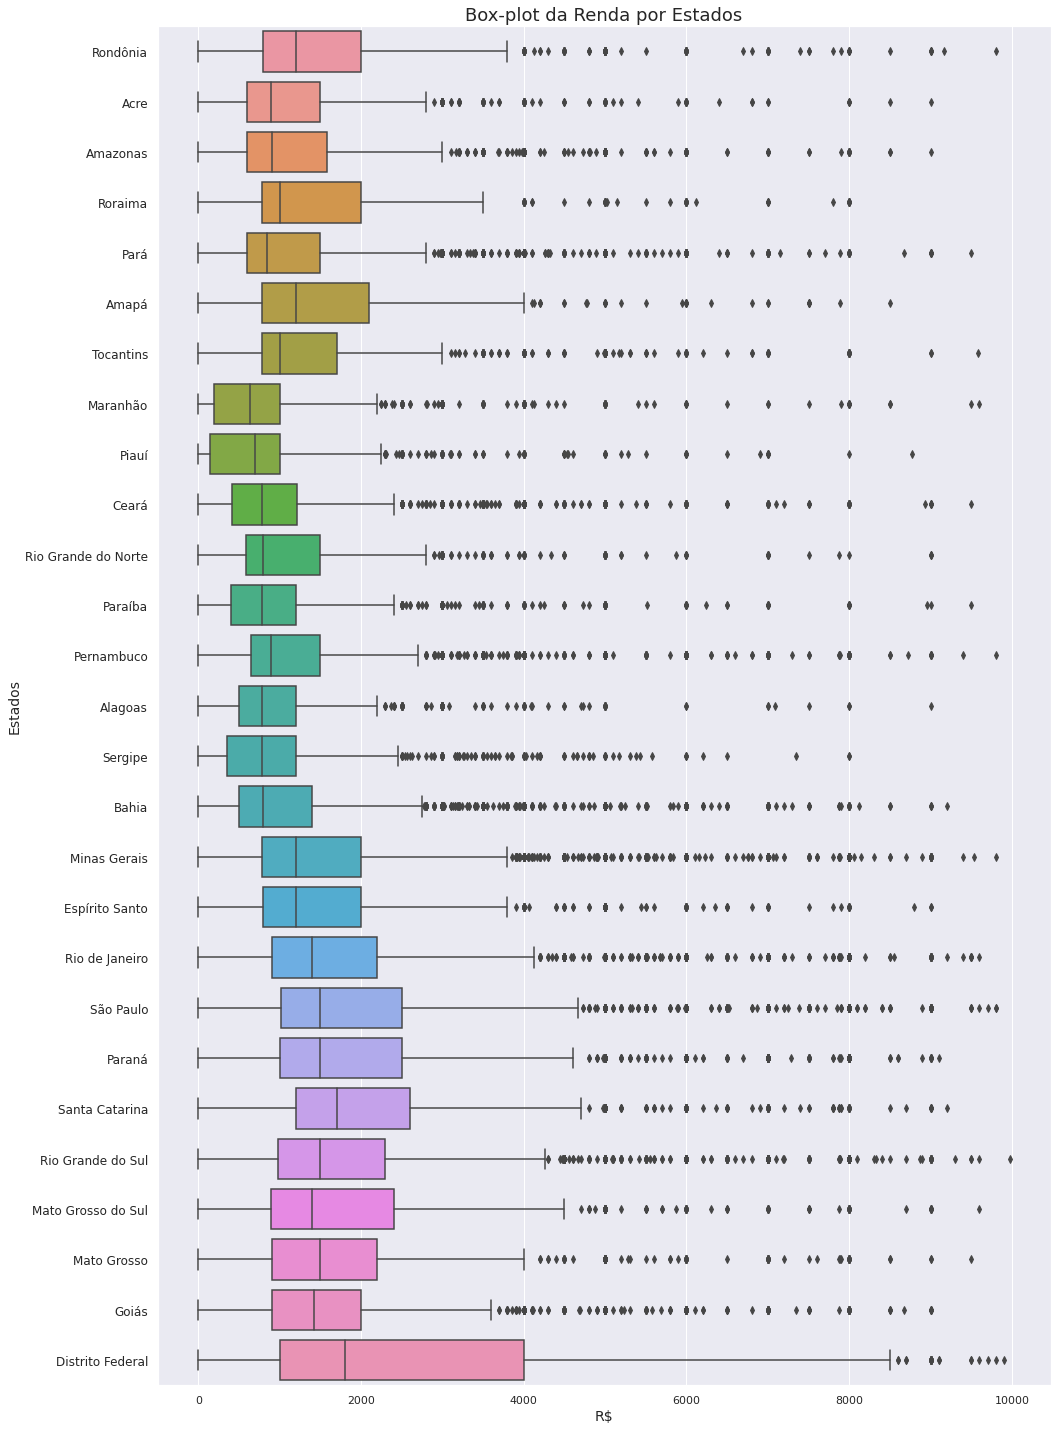

In [33]:
ax = sns.boxplot( x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(16,25)
ax.set_title('Box-plot da Renda por Estados', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Estados', fontsize=14)
ax.set_yticklabels([key for key in uf.values()], fontsize=12)
ax

### Analisando mais de perto a situação do Distrito Federal

No gráfico acima temos uma assimetria muito grande no Distrito Federal.

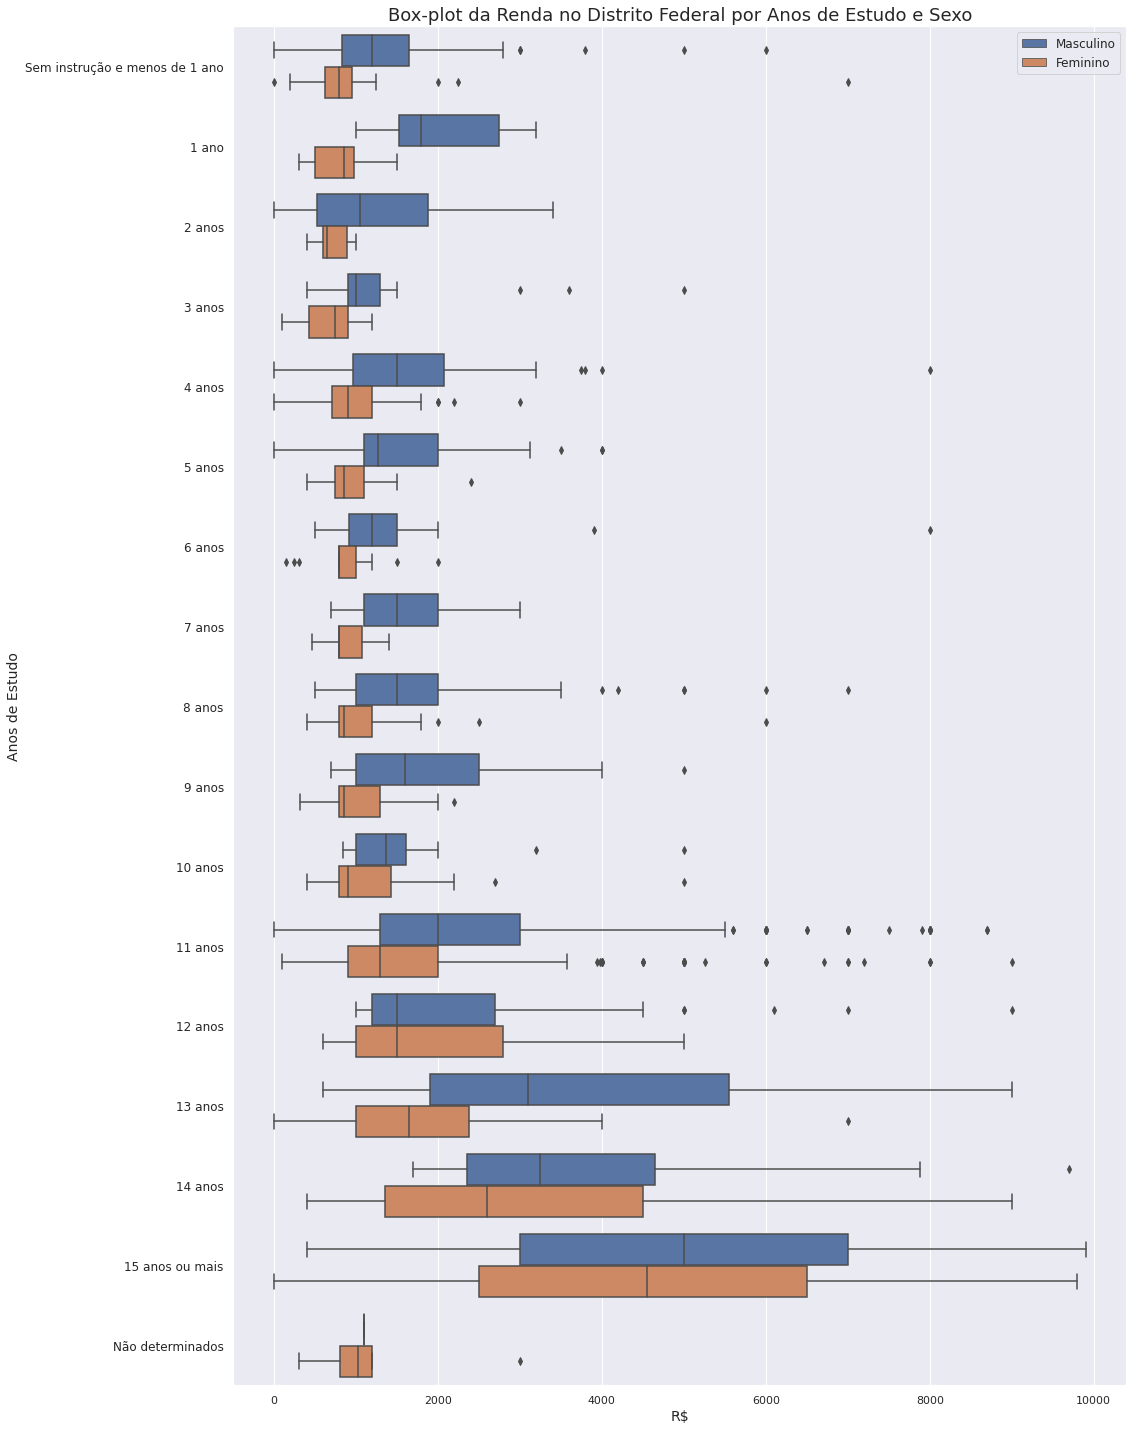

In [34]:
ax = sns.boxplot( x = 'Renda', y = 'Anos de Estudo',  hue='Sexo', data = dados.query('Renda < 10000 and UF == 53'), orient = 'h')
ax.figure.set_size_inches(16, 25)
ax.set_title('Box-plot da Renda no Distrito Federal por Anos de Estudo e Sexo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], fontsize=12)
ax

> ### Conclusões

1. Na distribuição de Renda por Estados, percebe-se uma grande diferença do Distrito Federal em relação aos outros.
2. Comparando o box-plot de Minas Gerais com Espirito Santo e de São Paulo com Paraná, eles possuem a mesma distribuição de renda.
3. Os estados do Maranhão e Piauí tem as menores rendas.
4. Verificando a distribuição de renda do Distrito Federal, ainda percebe-se a diferença de renda entre homens e mulheres, principalmente quando se verifica com 1 ano de estudo.
5. Verificar os anos 'Não determinados'


In [35]:
dados.query('Renda < 10000 and UF == 53 and Sexo == 0 and `Anos de Estudo` == 17')

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
75127,53,0,19,8,17,1100,1.69


In [36]:
dados.query('Renda < 10000 and UF == 53 and Sexo == 1 and `Anos de Estudo` == 17')

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
75779,53,1,40,2,17,840,1.78
75844,53,1,56,8,17,300,1.66
76041,53,1,22,2,17,788,1.70
76575,53,1,45,4,17,1200,1.64
76597,53,1,58,4,17,3000,1.75
76674,53,1,36,8,17,1200,1.63


Como tem apenas 1 registro não tem box-plot com os filtros acima.